In [10]:
from sklearn.decomposition import fastica # FastICA algorithm
import numpy as np # Numpy Arrays
import matplotlib.pyplot as plt # Used for plotting numpy arrays
from numpy import linalg as la # Used for finding the eigen values and vectors of a numpy array
import matplotlib.pyplot as plt # Used for graphing
import math # Using math function
from itertools import permutations # For finding permutations of a matrix

N = 10000 # Amount of instances

#S = np.random.laplace(loc=0.0, scale=1.0, size=(2,N)) # Matrix consisting of a laplace random distribution from [0,1)
#S = np.random.logistic(loc=0.0, scale=1.0, size=(2,N)) # Matrix consisting of a logistic random distribution from [0,1)
#S = np.random.gumbel(loc=0.0, scale=1.0, size=(2,N)) # Matrix consisting of a gumbel random distribution from [0, 1)
S = np.random.uniform(low=-1.0, high=1.0, size=(2,N)) # Matrix consisting of a uniform random distribution from [0, 1)
print(S.shape) # 2 by N matrix dimensions

(2, 10000)


[[ 0.27035174  0.61089151  0.44470766 ...  0.71999206 -0.87395069
  -0.95876481]
 [-0.54205901 -0.01220828 -0.06974549 ...  0.03011761  0.65804999
  -0.85772985]]


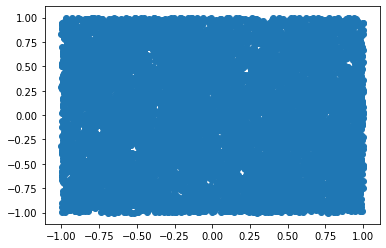

In [11]:
# Function used to normalize the columns to unit length so they can be compared easily
def normalize_cols(A):
    norms = la.norm(A,axis=0)
    return A / np.tile(norms,(2,1))

print(S)
plt.scatter(S[0,:], S[1,:]) # Printing the graph for S
plt.show()

(2, 2)


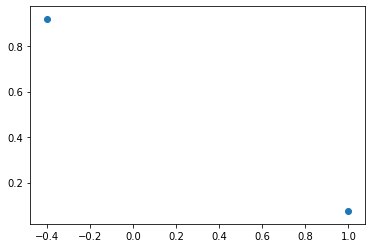

In [12]:
A = normalize_cols(np.random.normal(loc=0.0, scale=1.0, size=(2,2))) # Matrix consisting of a 2 by 2 Matrix, the mixing matrix
print(A.shape) # 2 by 2 matrix dimensions
plt.scatter(A[0,:], A[1,:]) # Printing the matrix A
plt.show()

In [13]:
print(A)

[[ 0.99713019 -0.39736676]
 [ 0.07570588  0.91765988]]


In [14]:
X = np.matmul(normalize_cols(A), S) # 2 by N matrix that we are given and need to solve for A
print(X.shape) # 2 by N

(2, 10000)


In [15]:
print(X)

[[ 0.48497212  0.61398954  0.47114598 ...  0.70595808 -1.13292981
  -0.61518   ]
 [-0.47695859  0.03504503 -0.03033565 ...  0.08214535  0.53770287
  -0.85968841]]


[[ 0.49002846  0.61904589  0.47620232 ...  0.71101443 -1.12787347
  -0.61012365]
 [-0.47190224  0.04010138 -0.0252793  ...  0.0872017   0.54275922
  -0.85463206]]


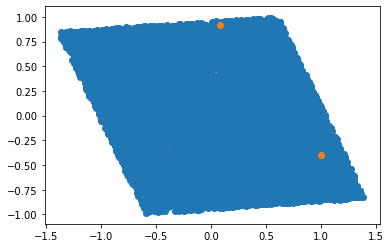

In [16]:
# First step: Subtract off the mean of the data in each dimension to make it a zero mean variable
X = np.subtract(X, np.mean(X)) # Subtracting the mean from every value of X
print(X)
plt.scatter(X[0,:], X[1,:])
plt.scatter(A[:,0], A[:,1])
plt.show()

In [17]:
# Compute the Covariance of X 
covX = (1/N) * np.matmul(X, X.transpose())
print(covX.shape) # 2 by 2 Covariance Matrix
print(covX)

(2, 2)
[[ 0.38264402 -0.09577151]
 [-0.09577151  0.28016201]]


In [18]:
# Second step: Whiten the data by calculating the eigenvectors and eigenvalues of the covariance of the data
eigvals, eigvecs = la.eig(covX) # Unpacking the tuple returned
print(f'Eigen values are: {eigvals}')
print(f'Eigen vectors are: {eigvecs}')
eigVec1 = eigvecs[:,0].reshape(2,1)
eigVec2 = eigvecs[:,1].reshape(2,1)
print('EigenVector1')
print(eigVec1)
print('EigenVector2')
print(eigVec2)
E = np.concatenate((eigVec1, eigVec2), axis=1) # Creating the E matrix of corresponding eigen vectors
print('This is the E matrix')
print(E)
Einv = la.inv(E) # Create the Inverse of the eigen vector matrix
Etrans = E.transpose() # Create the Transpose matrix of the eigen vector matrix
D = np.diag(eigvals) # Create the Diagonal matrix of eigen values
print('This is the diagonal matrix of eigenvalues')
print(D)
print('This is the inverse of the E matrix')
print(Einv)
print('This is the transpose of the E matrix')
print(Etrans)
# Either Einv or Etrans can be used because they are equal
print('These matrices should be equal due to them being orthogonal')

Eigen values are: [0.44002079 0.22278523]
Eigen vectors are: [[ 0.85783309  0.5139284 ]
 [-0.5139284   0.85783309]]
EigenVector1
[[ 0.85783309]
 [-0.5139284 ]]
EigenVector2
[[0.5139284 ]
 [0.85783309]]
This is the E matrix
[[ 0.85783309  0.5139284 ]
 [-0.5139284   0.85783309]]
This is the diagonal matrix of eigenvalues
[[0.44002079 0.        ]
 [0.         0.22278523]]
This is the inverse of the E matrix
[[ 0.85783309 -0.5139284 ]
 [ 0.5139284   0.85783309]]
This is the transpose of the E matrix
[[ 0.85783309 -0.5139284 ]
 [ 0.5139284   0.85783309]]
These matrices should be equal due to them being orthogonal


In [19]:
# Continued... Applying the full calculation with all metadata calculated
presWhite = np.matmul(np.sqrt(la.inv(D)), Etrans)
Xwhite = np.matmul(presWhite, X)
print(Xwhite.shape) # Dimensions of Xwhite
print(Xwhite)
print((1/N) * Xwhite @ Xwhite.T) # Should be the identity

(2, 10000)
[[ 0.99931552  0.7694822   0.63541089 ...  0.85192471 -1.87907463
  -0.12687987]
 [-0.32409617  0.74691647  0.47255902 ...  0.93265634 -0.24162938
  -2.21756067]]
[[1.00000000e+00 5.85469173e-17]
 [6.02816408e-17 1.00000000e+00]]


In [20]:
normalize_cols(A)
print(la.norm(normalize_cols(A),axis=0))

[1. 1.]


In [21]:
# Third step: Identify final rotation matrix that optimizes statistical independence
_, W, Sest = fastica(Xwhite.T, fun='cube', whiten=False)
print('W matrix')
print(W.shape)
print(W)
print('Should be close to A')
print(normalize_cols(la.inv(W @ presWhite)))
print(normalize_cols(A))
# Recall that X = AS; ica computes K and W (whitening and de-rotating, resp.) so that 
# S = W K X => Winv S = K X => Kinv Winv S = X = AS => Kinv Winv = A => (W K)inv = A

W matrix
(2, 2)
[[-0.71056738 -0.70362916]
 [ 0.70362916 -0.71056738]]
Should be close to A
[[-0.99725946  0.39673652]
 [-0.07398364 -0.91793253]]
[[ 0.99713019 -0.39736676]
 [ 0.07570588  0.91765988]]


In [22]:
# Short test without the whitening matrix pre-calculated
K2, W2, Sest2 = fastica(X.T, fun='cube')
print('W2 matrix')
print(W2.shape)
print(W2)
print('Should be close to A')
print(normalize_cols(la.inv(W2 @ K2)))
print(normalize_cols(A))

W2 matrix
(2, 2)
[[-0.99982592 -0.01865834]
 [-0.01865834  0.99982592]]
Should be close to A
[[ 0.85093486  0.53624025]
 [-0.52527123  0.8440654 ]]
[[ 0.99713019 -0.39736676]
 [ 0.07570588  0.91765988]]


[[ 0.99713019 -0.39736676]
 [ 0.07570588  0.91765988]]
[[-0.99725946  0.39673652]
 [-0.07398364 -0.91793253]]


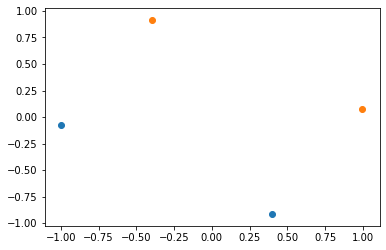

In [23]:
# Printing out the comparison between A and W * Wpres
graphW = normalize_cols(la.inv(W @ presWhite))
graphA = normalize_cols(A)

print(graphA)
print(graphW)

plt.scatter(graphW[0,:], graphW[1,:])
plt.scatter(graphA[0,:], graphA[1,:])
plt.show()

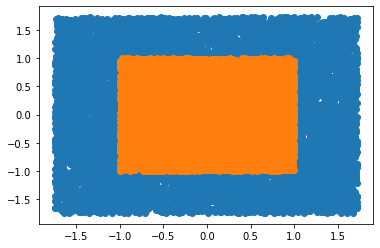

In [24]:
# Printing out the comparison between S and Sest without normalization
graphSest1 = Sest.T
graphS1 = S

plt.scatter(graphSest1[0,:], graphSest1[1,:])
plt.scatter(graphS1[0,:], graphS1[1,:])
plt.show()

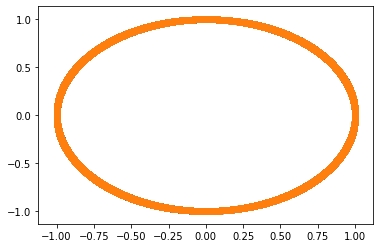

In [25]:
# Printing out the comparison between S and Sest normalized
graphSest = normalize_cols(Sest.T)
graphS = normalize_cols(S)

plt.scatter(graphSest[0,:], graphSest[1,:])
plt.scatter(graphS[0,:], graphS[1,:])
plt.show()

In [26]:
# Measuring the distance between two matrices A and W*Wpres as well as S and Sest using Frobenius norms

# calc_difference function using the frobenius distance
def calc_difference(A, B):
    first = np.subtract(A, B)
    second = np.subtract(A, B).conj().T
    inner = np.dot(first, second) # first @ second
    trace = inner.trace()
    return math.sqrt(trace)

# Calculating the error difference between S and Sest
error_S = calc_difference(graphS, graphSest)
print(error_S) # This doesnt mean anything

199.9940617360272


In [27]:
# Calculating the error difference between A and W*Wpres
# Problem: need to fix graphW by permuting and negating columns
# i.e. choose permutation/negation matrix P that minimizes calc_difference(graphA, graphW@P)
# note: there are n! of them, and 2^n ways to negate
# example P is [[0,-1], [1,0]] which swaps the two columns and negate the second one
error_A = calc_difference(graphA, graphW)
print(error_A)

2.8284265140973406


In [28]:
# For a Laplace distribution, the error calculation for the A matrix is lower than with a uniform random distribution
# For a logistic distribution, the error calculation was even less for the A matrix than the laplace distribution, and the S error value was slightly higher
# For a gumbel distribution, the error calculation was the highest amonng both the A and S matrix and was fairly inaccurate
# All of these observations were made based off of the general results from the uniform random distribution

In [29]:
# Creating a function to reduce the error between the estimated matrix and the original matrix 
def reduce_error(original, fix):
    min_fix = np.arange(1)
    identity = np.eye(len(original[:,0]))
    permList = list(permutations(identity))
    minimum_error = 100000
    for item in permList:
        matrix = np.array(item)
        orig_mat = matrix
        for num in range(2**len(original[:,0])):
            matrix = np.copy(orig_mat)
            bi = "{:02b}".format(num) # Is a string that needs to be parsed
            if (bi[0] == '1'):
                matrix[:,0] *= -1
            if (bi[1] == '1'):
                matrix[:,1] *= -1
            
            matrix[matrix == -0] = 0 # Fix -0
            
            check = fix @ matrix
            difference = calc_difference(original, check)
            if (difference < minimum_error):
                print(original)
                print(check)
                minimum_error = difference
                min_fix = np.copy(matrix @ fix)
    
    return (minimum_error, min_fix)
    
final_error, min_fix = reduce_error(graphA, graphW)
print(final_error)

[[ 0.99713019 -0.39736676]
 [ 0.07570588  0.91765988]]
[[-0.99725946  0.39673652]
 [-0.07398364 -0.91793253]]
[[ 0.99713019 -0.39736676]
 [ 0.07570588  0.91765988]]
[[-0.99725946 -0.39673652]
 [-0.07398364  0.91793253]]
[[ 0.99713019 -0.39736676]
 [ 0.07570588  0.91765988]]
[[ 0.99725946 -0.39673652]
 [ 0.07398364  0.91793253]]
0.0018585884877491514


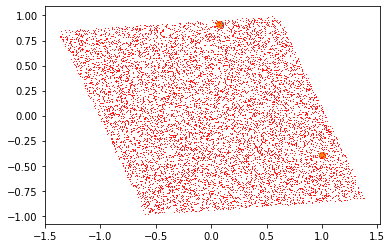

In [30]:
plt.plot(X[0,:], X[1,:], "rx", markersize=.3)
plt.scatter(graphA[:,0], graphA[:,1])
plt.scatter(min_fix[:,0], min_fix[:,1])
plt.show()